# **INTRODUCTION**
We will learn the process of solving regression problems and how to use libraries. We will use scikit-learn to perform learning and estimation. We will use the train.csv dataset from the House-Prices - Advanced Regression Techniques.

# **PREPARATION FOR PRACTICE**
This dataset has 79 features (objective variables), but as we discovered during our exploration in Week 3, it contains a variety of different types of data. How to preprocess this data is an important aspect of machine learning, but in order to prioritize learning regression problems and practicing evaluation, we will only use the two features and GrLivAreathe explanatory variables (features).YearBuilt

# Problem 1: Selecting Features For Practice
After loading the dataset, extract the explanatory variables GrLivArea and YearBuilt, and the objective variable SalePrice.

In [1]:
import pandas as pd
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Select explanatory variables (feature) and objective variable (target)
X=train_df[['GrLivArea','YearBuilt']]
y=train_df['SalePrice']

# Data overview
print(X.head())
print(y.head())

   GrLivArea  YearBuilt
0       1710       2003
1       1262       1976
2       1786       2001
3       1717       1915
4       2198       2000
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


# Problem 2: Estimation and evaluation using linear regression
Easily analyze and preprocess our data, and create and run a series of linear regression training, estimation, evaluation, and visualization workflows.

In regression problems, the mean squared error (MSE) is commonly used as an evaluation index .

We can visualize it by plotting the features on the horizontal axis and the predicted house price on the vertical axis.
Use scatter to create a graph that compares the actual data with the predicted results.



In [2]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Split data into train and test data for preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 2495554898.67
Coefficient of determination: 0.67


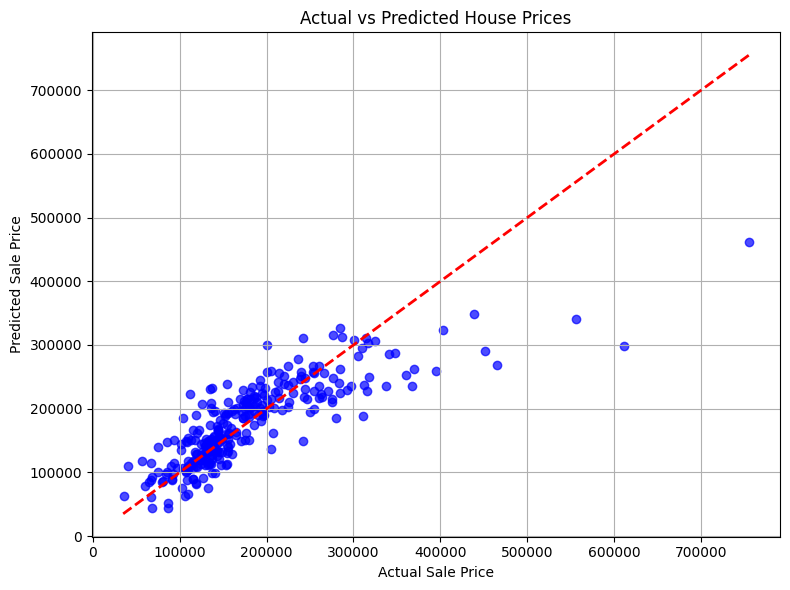

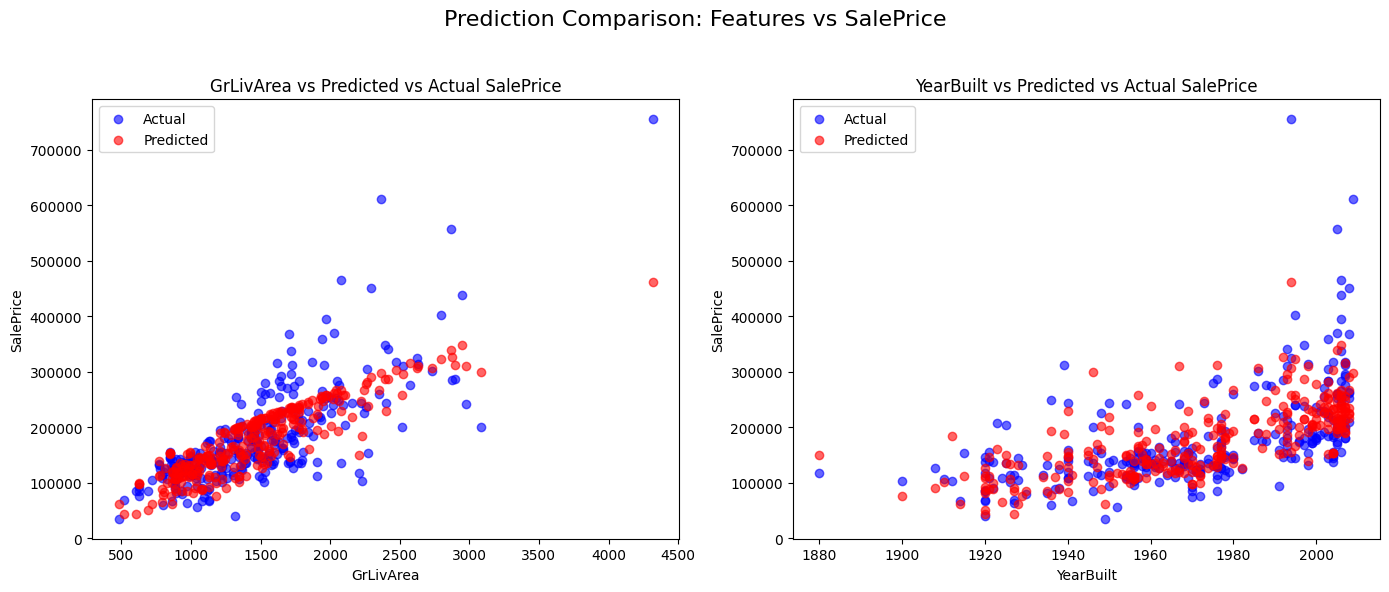

In [3]:
# Visualization: Actual vs Predicted prices
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # perfect prediction line
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.tight_layout()
plt.show()
# Visualization: Actual vs Predicted prices for the features
import matplotlib.pyplot as plt

features = ['GrLivArea', 'YearBuilt']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for i, feature in enumerate(features):
    axs[i].scatter(X_test[feature], y_test, label='Actual', color='blue', alpha=0.6)
    axs[i].scatter(X_test[feature], y_pred, label='Predicted', color='red', alpha=0.6)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("SalePrice")
    axs[i].set_title(f"{feature} vs Predicted vs Actual SalePrice")
    axs[i].legend()

plt.suptitle("Prediction Comparison: Features vs SalePrice", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Problem 3: Comparison of methods
We will now train, estimate, evaluate, and visualize all of the following methods. Then, summarize the index values ​​in one table. Using the table and the visualized figures, we will briefly discuss the results. State which method had which index value and what kind of figure was obtained.

- Linear regression
- SVM
- Decision Tree
- Random Forest

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "SVM": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# To store results
mse_results = {}
predictions = {}

# Train, estimate, evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    mse_results[name] = mse
    print(f"{name} MSE: {mse:.2f}")


Linear Regression MSE: 2495554898.67
SVM MSE: 7844111028.86
Decision Tree MSE: 2184045784.67
Random Forest MSE: 1546711974.03


In [5]:
# Visualize
def plot_actual_vs_predicted(predictions, y_test):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs = axs.flatten()
    
    for i, (name, y_pred) in enumerate(predictions.items()):
        axs[i].scatter(y_test, y_pred, alpha=0.6, color='teal', label='Predicted')
        axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect prediction')
        axs[i].set_title(f"{name}: Actual vs Predicted")
        axs[i].set_xlabel("Actual SalePrice")
        axs[i].set_ylabel("Predicted SalePrice")
        axs[i].legend()
        axs[i].grid(True)

    plt.suptitle("Model Accuracy: Actual vs Predicted", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [6]:
def plot_features_vs_predictions(X_test, y_test, predictions, features):
    for feature in features:
        fig, axs = plt.subplots(2, 2, figsize=(14, 10))
        axs = axs.flatten()
        
        for i, (name, y_pred) in enumerate(predictions.items()):
            axs[i].scatter(X_test[feature], y_test, alpha=0.6, label='Actual', color='dodgerblue')
            axs[i].scatter(X_test[feature], y_pred, alpha=0.6, label='Predicted', color='orange')
            axs[i].set_title(f"{name}: {feature} vs SalePrice")
            axs[i].set_xlabel(feature)
            axs[i].set_ylabel("SalePrice")
            axs[i].legend()
            axs[i].grid(True)
        
        plt.suptitle(f"{feature} vs SalePrice (Actual & Predicted)", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


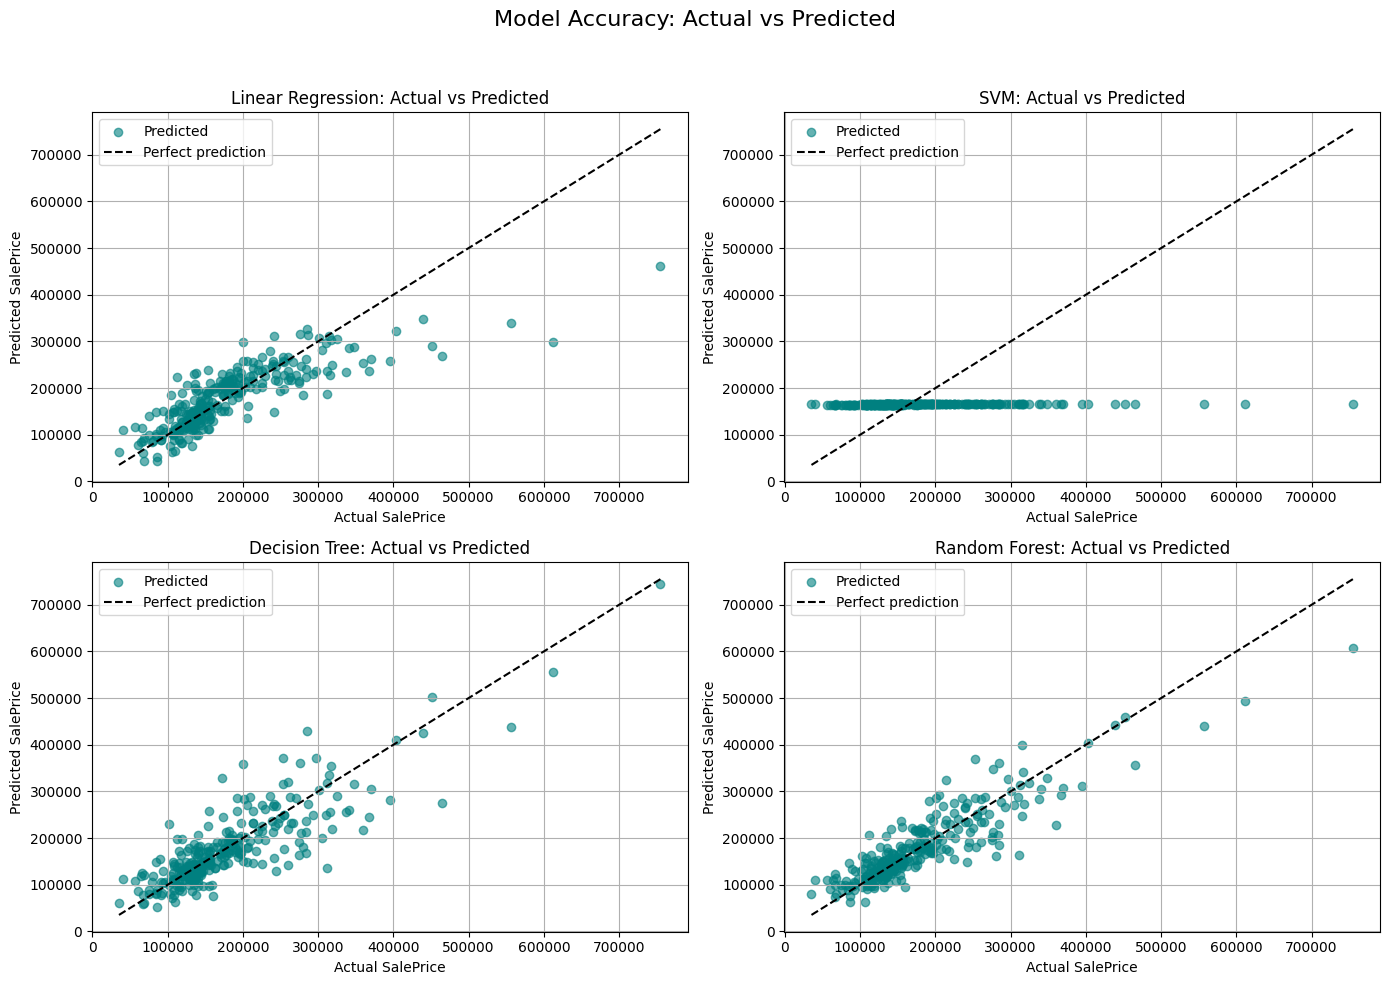

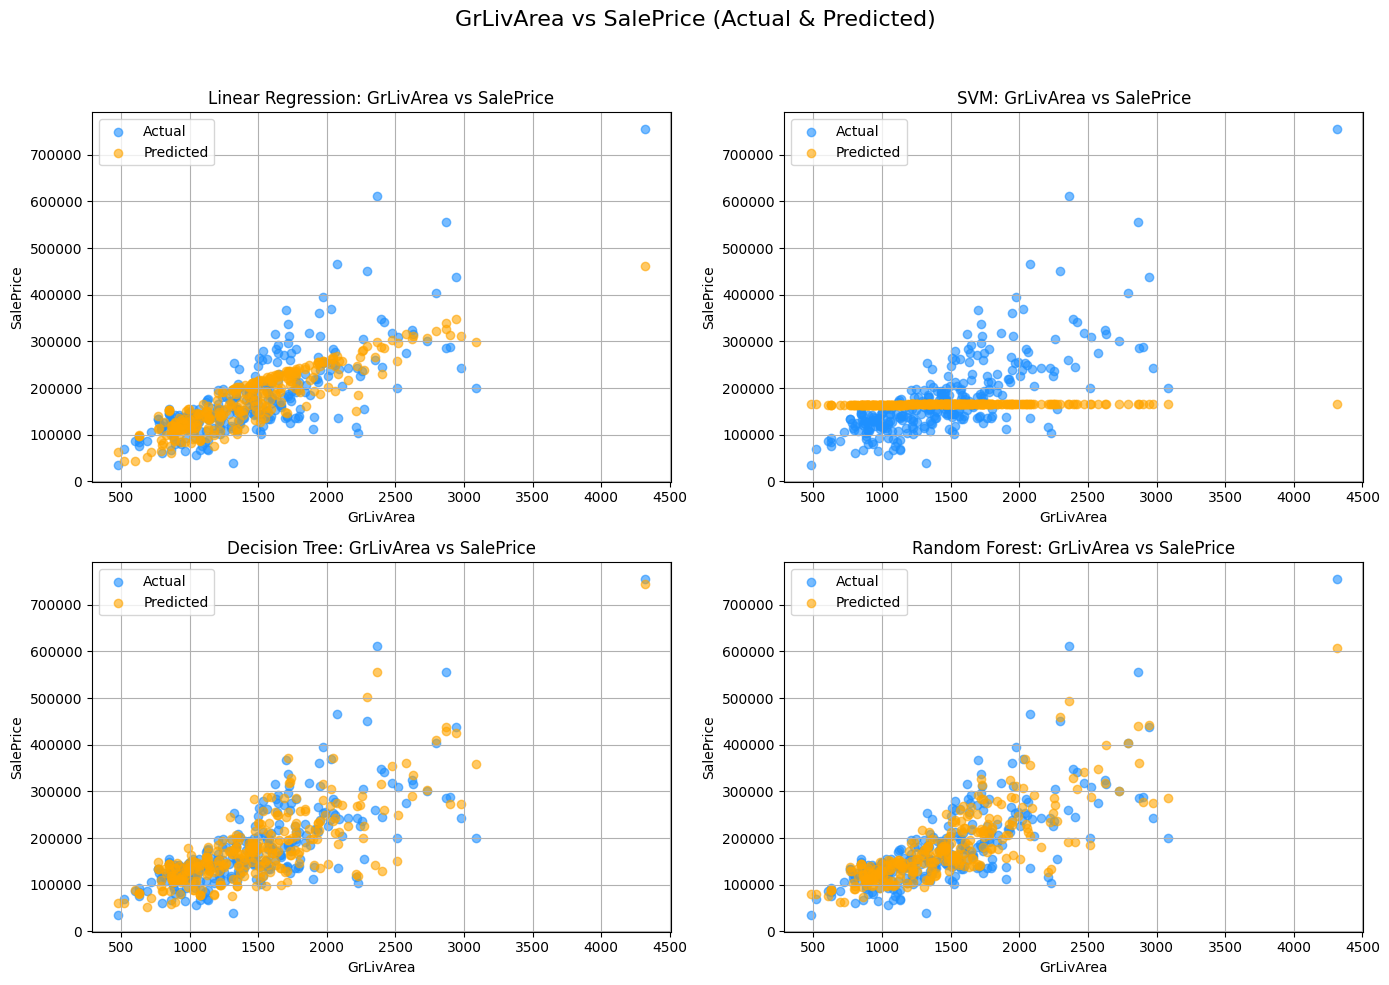

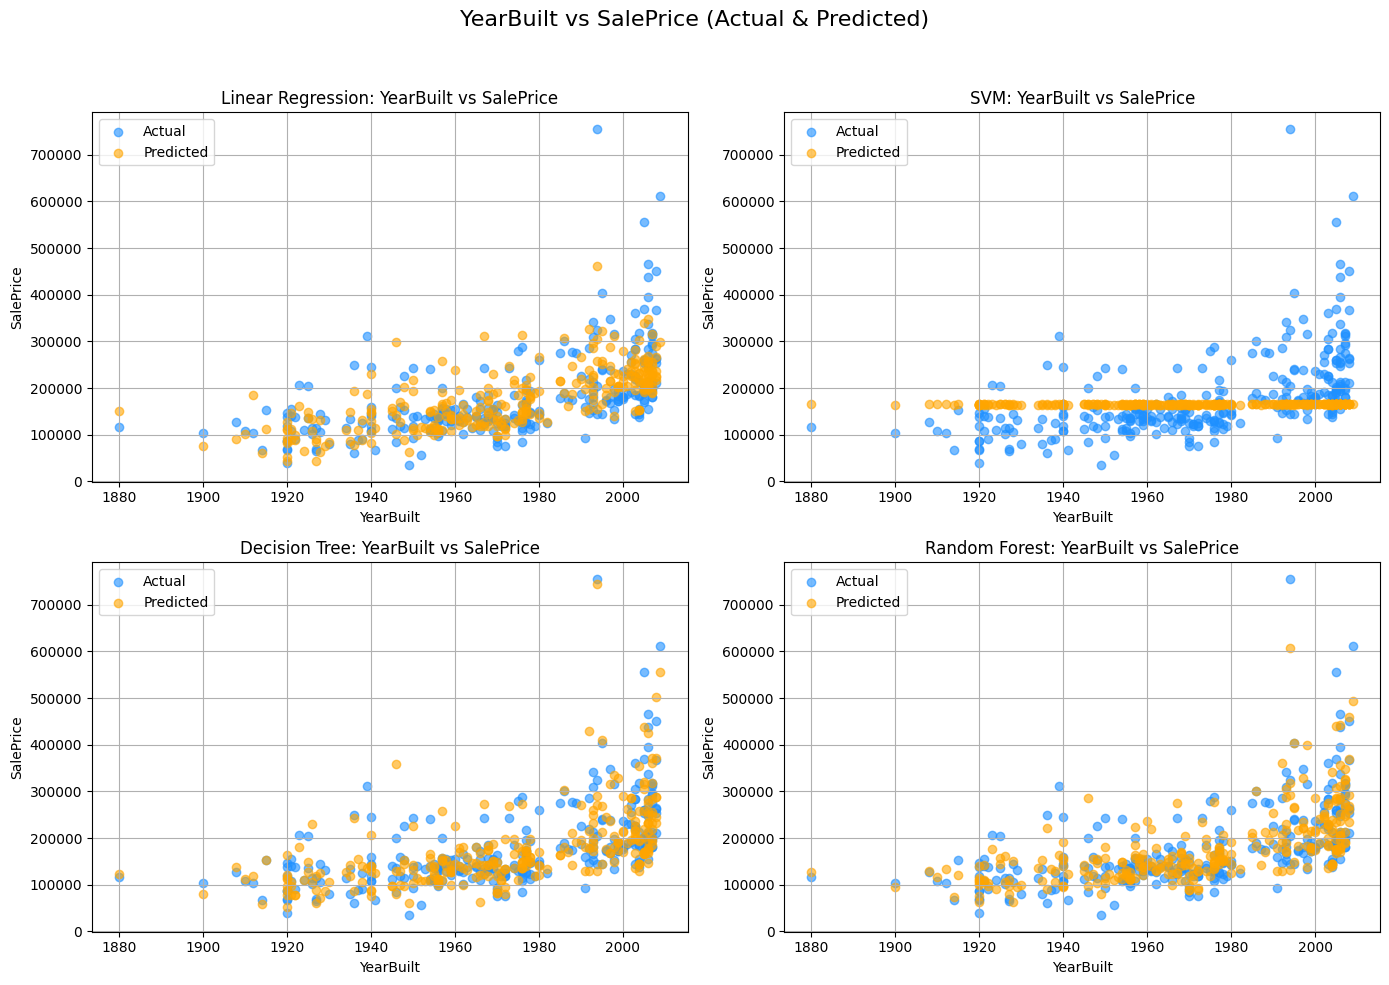

In [7]:
plot_actual_vs_predicted(predictions, y_test)
plot_features_vs_predictions(X_test, y_test, predictions, ['GrLivArea', 'YearBuilt'])


In [8]:
# Table Summary
# Create a DataFrame from the mse_results dictionary
mse_df = pd.DataFrame.from_dict(mse_results, orient='index', columns=['Mean Squared Error'])
mse_df = mse_df.sort_values(by='Mean Squared Error', ascending=True)

# Display the table
print(mse_df)
mse_df.style.highlight_min(color='lightgreen') #(highlight best mse)

                   Mean Squared Error
Random Forest            1.546712e+09
Decision Tree            2.184046e+09
Linear Regression        2.495555e+09
SVM                      7.844111e+09


,Mean Squared Error
Random Forest,1546711974.025004
Decision Tree,2184045784.668189
Linear Regression,2495554898.668321
SVM,7844111028.863974


Random Forest Regression produced the lowest MSE and had the tightest cluster of points around the ideal line. It handled both features well and gave the most accurate predictions.

Decision Tree Regression showed a good fit but with more scatter than Random Forest — likely overfitting to certain values due to its tree structure.

Linear Regression has an MSE of 2.3e9 and displayed a consistent trend but was too simplistic to model complex relationships resulting in higher error.

Support Vector Regression (SVM) had the highest MSE, likely due to lack of scaling and parameter tuning. Its predictions were mostly flat, indicating underfitting.

# Problem 4: Learning using other features
So far, we have only used two features for practice, but we can verify what happens when we add other features. Data analysis is important in determining how to select and process the features. We will add 3 relevant numeric features ('OverallQual', 'TotalBsmtSF', 'GarageCars')

In [9]:
current_features = ['GrLivArea', 'YearBuilt', 'OverallQual', 'TotalBsmtSF', 'GarageCars']

# Preparation of Data
X = train_df[current_features] # update X DataFrame
y = train_df['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Using the existing loop above with the new features
mse_results_advanced= {}
predictions_advanced = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions_advanced[name] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    mse_results_advanced[name] = mse
    print(f"{name} MSE with more features: {mse:.2f}")

Linear Regression MSE with more features: 1581119650.39
SVM MSE with more features: 7851191213.20
Decision Tree MSE with more features: 1656178468.06
Random Forest MSE with more features: 834055786.15


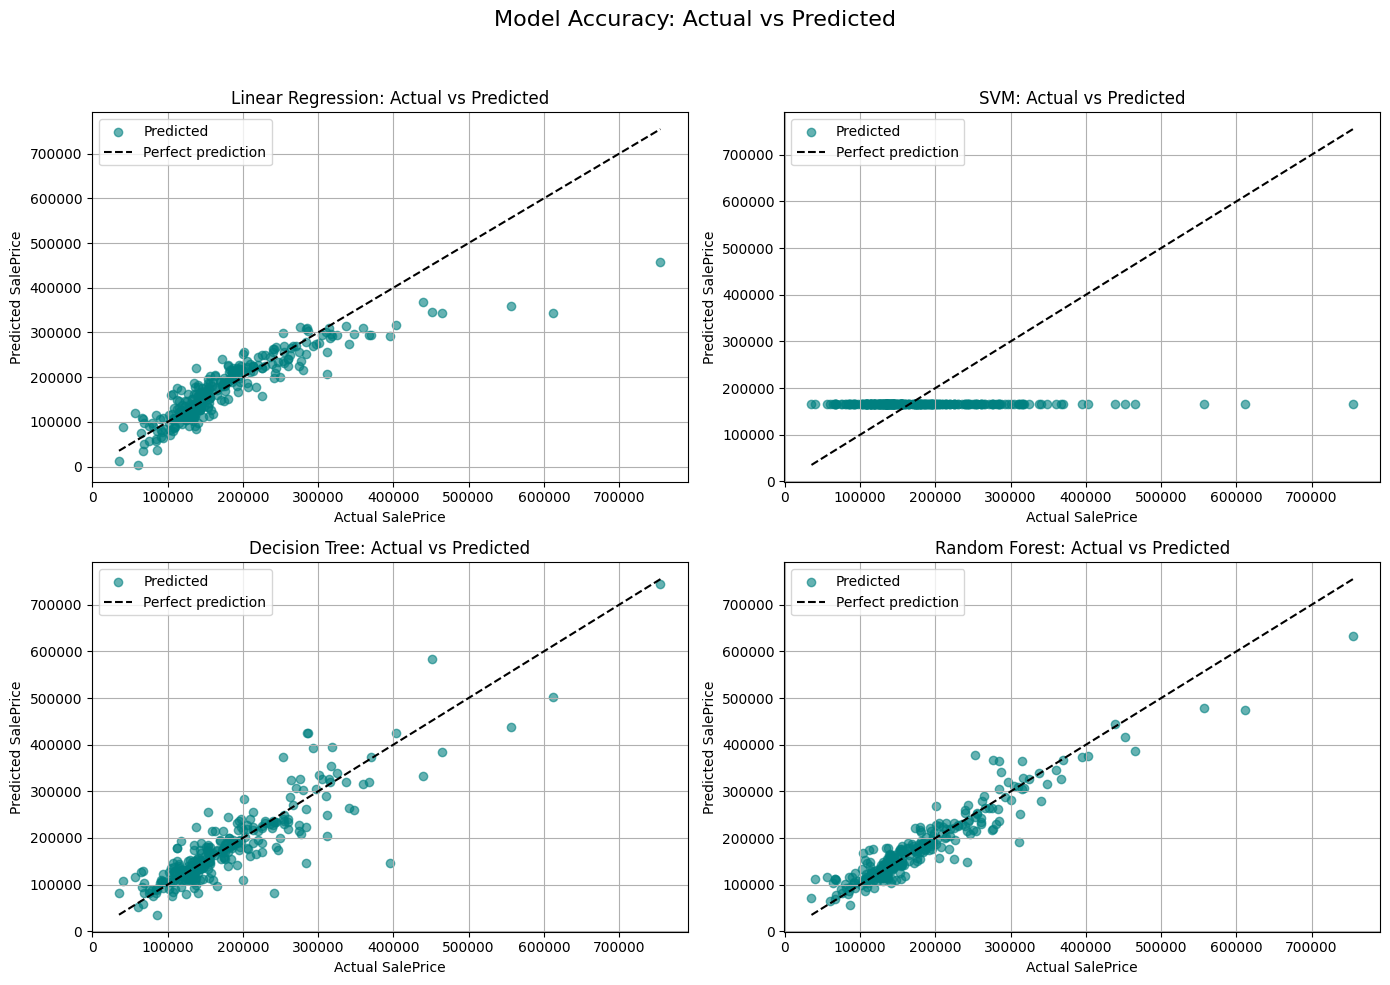

In [11]:
# Visualizing
plot_actual_vs_predicted(predictions_advanced, y_test)

In [12]:
# Summary Table
mse_df_advanced = pd.DataFrame.from_dict(mse_results_advanced, orient='index', columns=['MSE (More Features)'])
mse_df_advanced = mse_df_advanced.sort_values(by='MSE (More Features)')
mse_df_advanced.style.highlight_min(color='lightgreen')

,MSE (More Features)
Random Forest,834055786.146798
Linear Regression,1581119650.393661
Decision Tree,1656178468.057077
SVM,7851191213.203971


Random Forest continues to top cutting its MSE nearly by a halfa and handles complex relationships and interactions perfectly.

Linear Regression improved significantly with addtional features but likely limited because of linearity assumption.

Decision Tree improved slightly which may be due to overfitting.

SVM has very high MSE likely due to non-linear kernel not used, poor fit for this problem or sensitivity to feature scaling.